In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_table('/Users/shaswati/Downloads/EmployeeDetails.txt')
data.head()

,first_name,last_name,gender,personal_email,ssn,birth_date,start_date,office,title,org,accrued_holidays,salary,bonus
0,Leroy,Harper,M,monica70@arroyo.com,847-23-4714,7/9/1980,7/4/2001,Chicago,Manager,Devops,9,142000,28000
1,Tyler,Lowe,M,qterry@white.com,161-95-0712,5/3/1985,4/27/2008,Chicago,Manager,Devops,10,132000,22000
2,Kenneth,Rice,M,wthornton@floyd.com,688-45-4491,2/7/1978,2/1/2004,Austin,Engineer,Platform,6,120000,18500
3,James,Stevens,M,morenolori@yahoo.com,447-94-1024,12/6/1980,11/30/2007,Chicago,Senior Engineer,Devops,3,130000,22000
4,Hailey,Wise,F,erica69@yahoo.com,475-35-6073,1/10/1997,1/6/2016,New York,Associate,Sales,15,64000,12000


In [3]:
data.rename(columns={'office': 'location'}, inplace= True)
data.drop(['first_name', 'last_name', 'gender', 'personal_email', 'ssn', 'birth_date', 'start_date', 'org', 'accrued_holidays', 'bonus'], axis=1, inplace= True)
data.head()

,location,title,salary
0,Chicago,Manager,142000
1,Chicago,Manager,132000
2,Austin,Engineer,120000
3,Chicago,Senior Engineer,130000
4,New York,Associate,64000


In [4]:
data.shape

(66, 3)

In [5]:
data.isnull().sum()

location    0
title       0
salary      0
dtype: int64

In [6]:
print(data['location'].unique())
print(data['title'].unique())

['Chicago' 'Austin' 'New York' 'Seattle']
['Manager' 'Engineer' 'Senior Engineer' 'Associate' 'VP']


In [7]:
data= pd.get_dummies(data, drop_first=True)
data.head()

,salary,location_Chicago,location_New York,location_Seattle,title_Engineer,title_Manager,title_Senior Engineer,title_VP
0,142000,1,0,0,0,1,0,0
1,132000,1,0,0,0,1,0,0
2,120000,0,0,0,1,0,0,0
3,130000,1,0,0,0,0,1,0
4,64000,0,1,0,0,0,0,0


In [8]:
data.corr()

,salary,location_Chicago,location_New York,location_Seattle,title_Engineer,title_Manager,title_Senior Engineer,title_VP
salary,1.000000,-0.067342,-0.656155,0.466099,-0.259308,0.131315,0.002825,0.789833
location_Chicago,-0.067342,1.000000,-0.288675,-0.375000,0.261682,0.166004,0.129619,-0.288675
location_New York,-0.656155,-0.288675,1.000000,-0.288675,-0.277664,-0.322031,-0.119737,-0.222222
location_Seattle,0.466099,-0.375000,-0.288675,1.000000,-0.205102,0.239046,-0.155543,0.328769
title_Engineer,-0.259308,0.261682,-0.277664,-0.205102,1.000000,-0.402374,-0.149610,-0.277664
title_Manager,0.131315,0.166004,-0.322031,0.239046,-0.402374,1.000000,-0.173515,-0.322031
title_Senior Engineer,0.002825,0.129619,-0.119737,-0.155543,-0.149610,-0.173515,1.000000,-0.119737
title_VP,0.789833,-0.288675,-0.222222,0.328769,-0.277664,-0.322031,-0.119737,1.000000


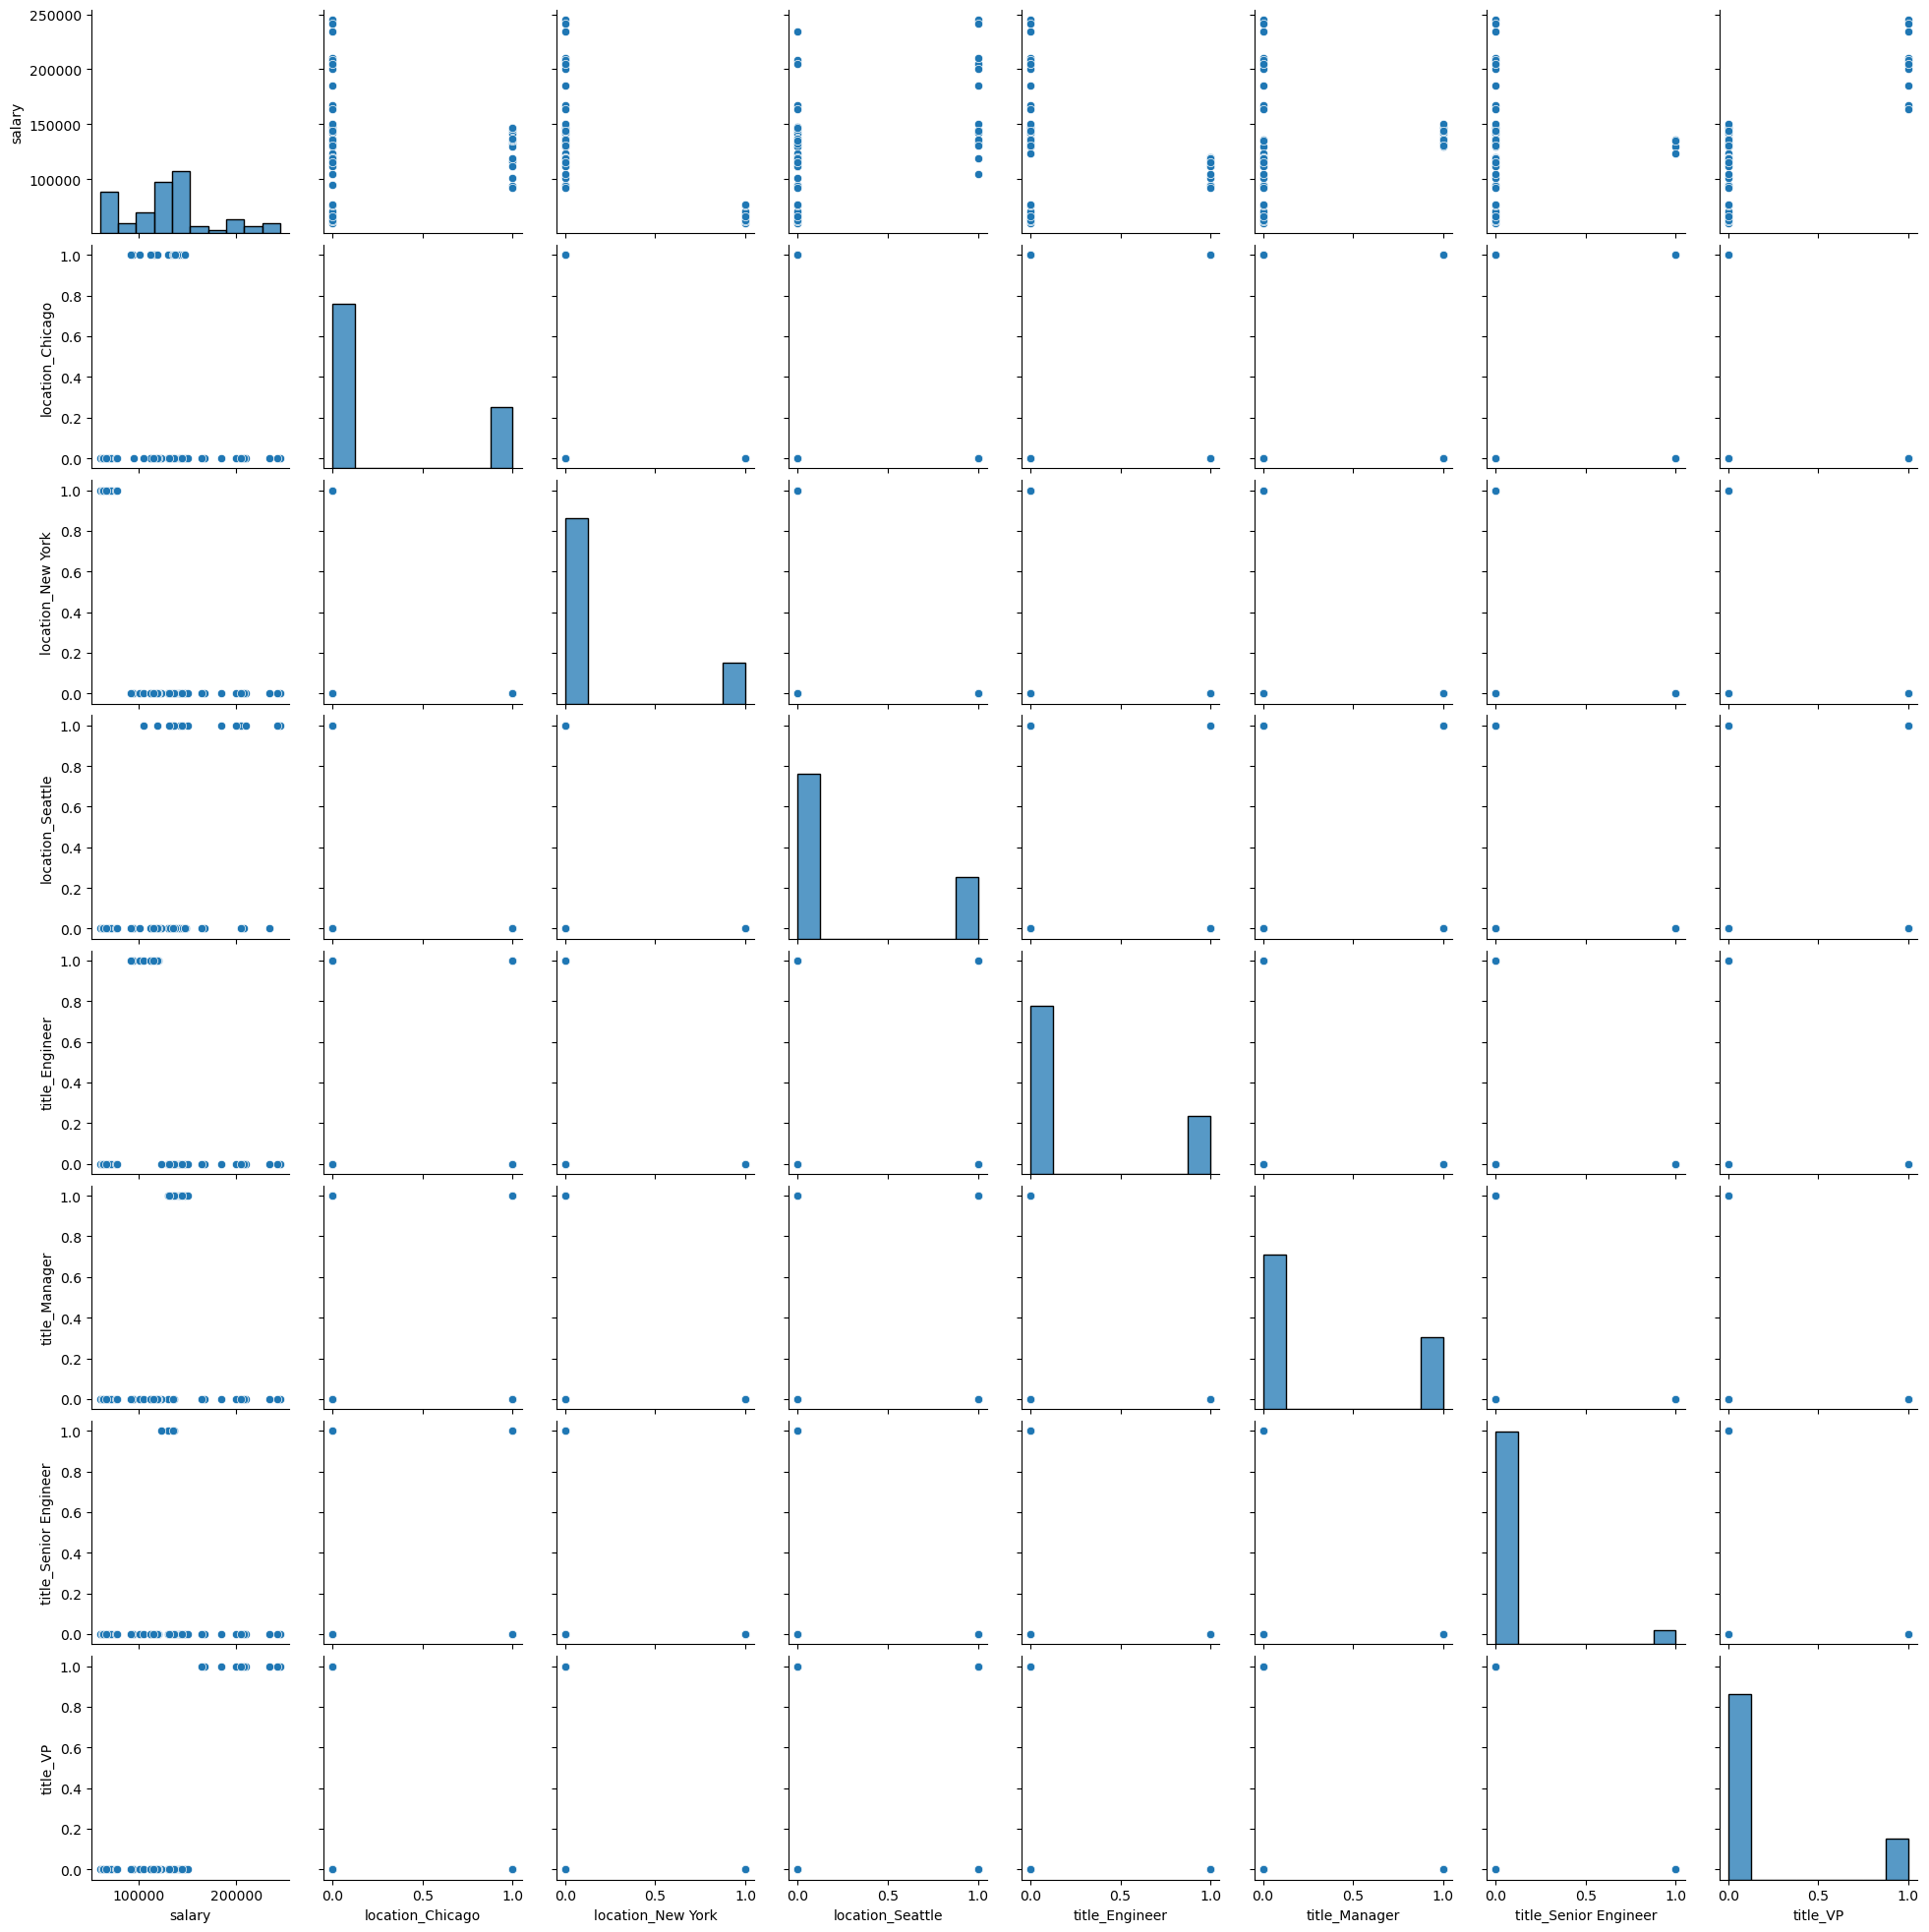

In [9]:
sns.pairplot(data)

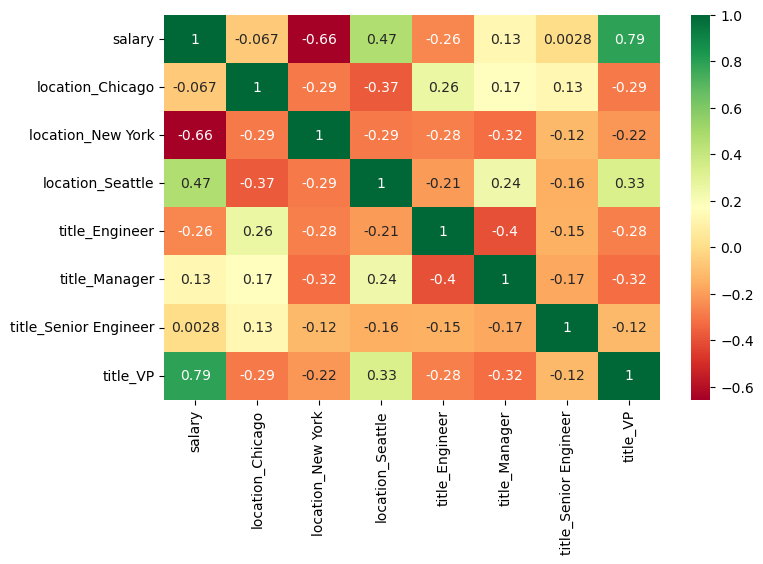

In [10]:
corrmat= data.corr()
top_corr= corrmat.index
plt.figure(figsize=(8,5))
g= sns.heatmap(data[top_corr].corr(), annot= True, cmap='RdYlGn')

In [11]:
data.head()

,salary,location_Chicago,location_New York,location_Seattle,title_Engineer,title_Manager,title_Senior Engineer,title_VP
0,142000,1,0,0,0,1,0,0
1,132000,1,0,0,0,1,0,0
2,120000,0,0,0,1,0,0,0
3,130000,1,0,0,0,0,1,0
4,64000,0,1,0,0,0,0,0


In [12]:
X= data.iloc[:,1:]
y= data.iloc[:,0]

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)

[0.00098829 0.2607152  0.0073183  0.05990642 0.00073448 0.00105693
 0.66928038]


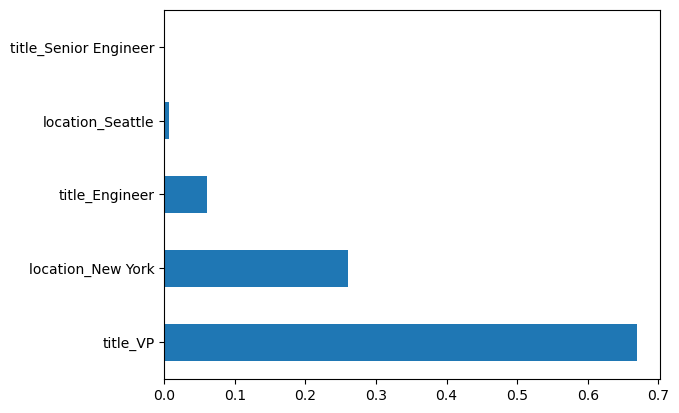

In [15]:
feat_imp= pd.Series(model.feature_importances_, index= X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(52, 7)

In [18]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost' : XGBRegressor(), 
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE: {rmse:.2f}')

Decision Tree RMSE: 12832.18
XGBoost RMSE: 12832.17
Random Forest RMSE: 12423.63


In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
y_pred = rf.predict(X_test)

<AxesSubplot: xlabel='salary', ylabel='Density'>

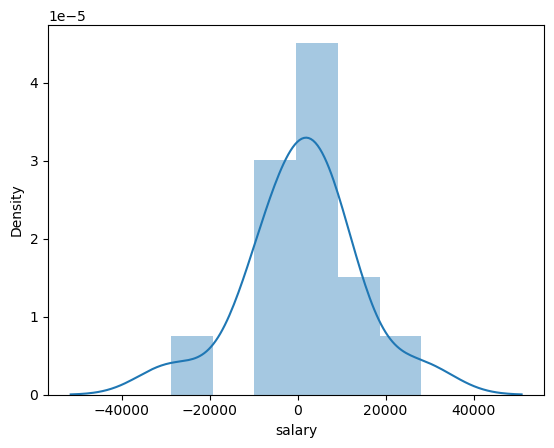

In [21]:
sns.distplot(y_test-y_pred)

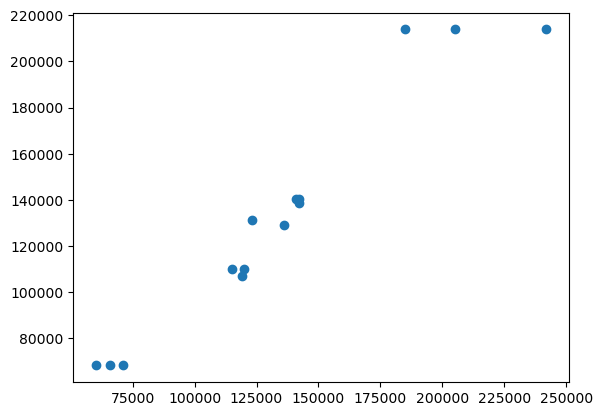

In [22]:
plt.scatter(y_test,y_pred)

In [23]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R-Square:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 8970.323826966687
MSE: 154615831.145866
R-Square: 0.9371721425440509
RMSE: 12434.46143368767
